In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes.info() 
diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [5]:
#Segregating categorical columns and numerical columns
cat_columns = [col for col in diabetes.columns if diabetes[col].dtype in ['object']]
numerical_columns = [col for col in diabetes.columns if diabetes[col].dtype in ['int32', 'float32', 'int64', 'float64']]

In [6]:
print('Categorical columns in dataset (no of columns - {}): '.format(len(cat_columns)), cat_columns)
print('Numerical columns in dataset (no of columns - {})'.format(len(numerical_columns)),numerical_columns)

Categorical columns in dataset (no of columns - 0):  []
Numerical columns in dataset (no of columns - 9) ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#find the percentage of missing values in each column
diabetes.isnull().sum()/len(diabetes)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [9]:
diabetes.groupby('Outcome')['Outcome'].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

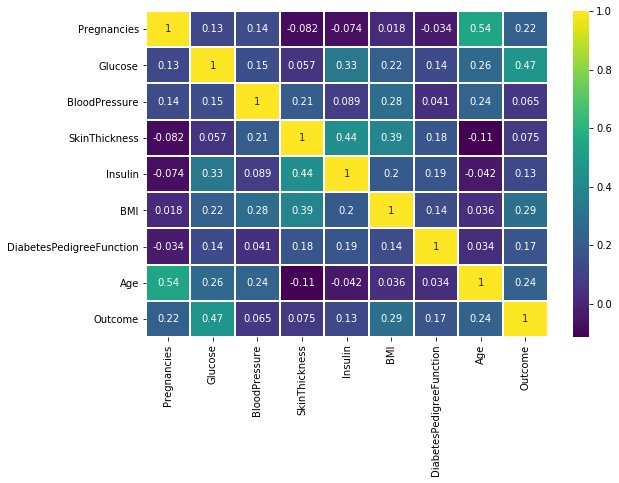

In [10]:
#Print the heatmap of correlations amongst the variables. This is possible as number of variables is less.
plt.figure(figsize=(9,6))
sns.heatmap(data=diabetes.corr(), cmap='viridis', annot=True, linecolor='w', linewidths=1)

In [11]:
#separate out the target variable
data = diabetes.iloc[:,:-1]
target = diabetes.iloc[:,-1]
print(data.head(2))
print(target.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
0    1
1    0
Name: Outcome, dtype: int64


In [12]:
#feature scaling using Standard Scaler & MinMax Scaler. Any one to be commented out based on results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#data_scaled = scaler.fit_transform(data)

In [13]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.25, random_state = 1000)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [14]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, criterion = 'friedman_mse', 
                                           min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=2,)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
y_hat = gb_classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_hat))
print('Accuracy Score: ', (accuracy_score(y_test, y_hat)).round(4))
print(classification_report(y_test, y_hat))

[[107  18]
 [ 26  41]]
Accuracy Score:  0.7708
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.69      0.61      0.65        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



In [17]:
#Tuning Gradient Boosting Algorithm
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold

n_estimators = [100,150,200,225,250];
max_depth = [1,2,3,4,5,6];
#criterions = ['friedman_mse'];
#loss = ['deviance'];
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2];

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rates
             }

gbc_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameters, cv=cv, n_jobs= -1)
gbc_grid.fit(data_scaled, target)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  m...
                                                  n_iter_no_change=None,
                                                  presort='auto',
                

In [18]:
print(gbc_grid.best_score_)
print(gbc_grid.best_params_)

0.7721354166666666
{'learning_rate': 0.15, 'max_depth': 1, 'n_estimators': 150}


In [19]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',max_depth=8, max_features='auto', max_leaf_nodes=None, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=175)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_hat = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_hat))
print('Accuracy Score: ', (accuracy_score(y_test, y_hat)).round(4))
print(classification_report(y_test, y_hat))

[[111  14]
 [ 30  37]]
Accuracy Score:  0.7708
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       125
           1       0.73      0.55      0.63        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



In [140]:
#Deep Learning Model with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [141]:
#train test split once more
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.25, random_state=1000)

In [142]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, activation='relu', kernel_initializer = 'glorot_uniform', input_dim=8))
    classifier.add(Dropout(0.3))
    classifier.add(Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'))
    classifier.add(Dropout(0.3))
    classifier.add(Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=keras.optimizers.Adam(lr=0.004), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [143]:
nn_classifier = build_classifier()

In [144]:
nn_classifier.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_45 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_46 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_79 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_47 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)               

In [145]:
nn_classifier.fit(X_train, y_train, batch_size=16, epochs=300)

Epoch 1/300
576/576 [==============================] - 1s 884us/step - loss: 0.7028 - accuracy: 0.5486
Epoch 2/300
576/576 [==============================] - 0s 100us/step - loss: 0.6406 - accuracy: 0.6250
Epoch 3/300
576/576 [==============================] - 0s 123us/step - loss: 0.6243 - accuracy: 0.66490s - loss: 0.6170 - accuracy: 0.67
Epoch 4/300
576/576 [==============================] - 0s 90us/step - loss: 0.5830 - accuracy: 0.6753
Epoch 5/300
576/576 [==============================] - 0s 155us/step - loss: 0.5960 - accuracy: 0.6771
Epoch 6/300
576/576 [==============================] - 0s 175us/step - loss: 0.5678 - accuracy: 0.6997
Epoch 7/300
576/576 [==============================] - 0s 163us/step - loss: 0.5851 - accuracy: 0.6840
Epoch 8/300
576/576 [==============================] - 0s 164us/step - loss: 0.5531 - accuracy: 0.7049
Epoch 9/300
576/576 [==============================] - 0s 210us/step - loss: 0.5648 - accuracy: 0.6997
Epoch 10/300
576/576 [==================

576/576 [==============================] - 0s 196us/step - loss: 0.4868 - accuracy: 0.7604
Epoch 80/300
576/576 [==============================] - 0s 178us/step - loss: 0.4642 - accuracy: 0.7726
Epoch 81/300
576/576 [==============================] - 0s 201us/step - loss: 0.4855 - accuracy: 0.7708
Epoch 82/300
576/576 [==============================] - 0s 196us/step - loss: 0.4760 - accuracy: 0.7691
Epoch 83/300
576/576 [==============================] - 0s 197us/step - loss: 0.4819 - accuracy: 0.7465
Epoch 84/300
576/576 [==============================] - 0s 159us/step - loss: 0.4886 - accuracy: 0.7622
Epoch 85/300
576/576 [==============================] - 0s 154us/step - loss: 0.4662 - accuracy: 0.7639
Epoch 86/300
576/576 [==============================] - 0s 166us/step - loss: 0.5006 - accuracy: 0.7413
Epoch 87/300
576/576 [==============================] - 0s 154us/step - loss: 0.4869 - accuracy: 0.7604
Epoch 88/300
576/576 [==============================] - 0s 201us/step - loss:

576/576 [==============================] - 0s 197us/step - loss: 0.4642 - accuracy: 0.7569
Epoch 158/300
576/576 [==============================] - 0s 170us/step - loss: 0.4789 - accuracy: 0.7656
Epoch 159/300
576/576 [==============================] - 0s 170us/step - loss: 0.4297 - accuracy: 0.7778
Epoch 160/300
576/576 [==============================] - 0s 164us/step - loss: 0.4671 - accuracy: 0.7830
Epoch 161/300
576/576 [==============================] - 0s 161us/step - loss: 0.4638 - accuracy: 0.7552
Epoch 162/300
576/576 [==============================] - 0s 164us/step - loss: 0.4535 - accuracy: 0.7656
Epoch 163/300
576/576 [==============================] - 0s 225us/step - loss: 0.4527 - accuracy: 0.7882
Epoch 164/300
576/576 [==============================] - 0s 239us/step - loss: 0.4703 - accuracy: 0.7708
Epoch 165/300
576/576 [==============================] - 0s 204us/step - loss: 0.4752 - accuracy: 0.7413
Epoch 166/300
576/576 [==============================] - 0s 173us/ste

576/576 [==============================] - 0s 171us/step - loss: 0.4575 - accuracy: 0.7587
Epoch 236/300
576/576 [==============================] - 0s 206us/step - loss: 0.4670 - accuracy: 0.7726
Epoch 237/300
576/576 [==============================] - 0s 182us/step - loss: 0.4437 - accuracy: 0.7708
Epoch 238/300
576/576 [==============================] - 0s 170us/step - loss: 0.4582 - accuracy: 0.7726
Epoch 239/300
576/576 [==============================] - 0s 171us/step - loss: 0.4681 - accuracy: 0.7691
Epoch 240/300
576/576 [==============================] - 0s 161us/step - loss: 0.4373 - accuracy: 0.7882
Epoch 241/300
576/576 [==============================] - 0s 175us/step - loss: 0.4545 - accuracy: 0.7500
Epoch 242/300
576/576 [==============================] - 0s 204us/step - loss: 0.4656 - accuracy: 0.7726
Epoch 243/300
576/576 [==============================] - 0s 180us/step - loss: 0.4642 - accuracy: 0.7865
Epoch 244/300
576/576 [==============================] - 0s 170us/ste

In [146]:
y_hat = nn_classifier.predict_classes(X_test)

In [147]:
len(y_hat[y_hat > 0])

81

In [148]:
print(confusion_matrix(y_test, y_hat))
print('Accuracy Score: ', (accuracy_score(y_test, y_hat)).round(4))
print(classification_report(y_test, y_hat))

[[98 27]
 [13 54]]
Accuracy Score:  0.7917
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       125
           1       0.67      0.81      0.73        67

    accuracy                           0.79       192
   macro avg       0.77      0.79      0.78       192
weighted avg       0.81      0.79      0.80       192



In [139]:
#Tuning the Neural network
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [8, 16, 32],
              'epochs': [100, 300, 500]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
460/460 [==============================] - 1s 1ms/step - loss: 0.6609 - accuracy: 0.6152
Epoch 2/100
460/460 [==============================] - 0s 457us/step - loss: 0.6303 - accuracy: 0.6609
Epoch 3/100
460/460 [==============================] - 0s 323us/step - loss: 0.5899 - accuracy: 0.7087
Epoch 4/100
460/460 [==============================] - 0s 330us/step - loss: 0.5804 - accuracy: 0.7087
Epoch 5/100
460/460 [==============================] - 0s 291us/step - loss: 0.5851 - accuracy: 0.7304
Epoch 6/100
460/460 [==============================] - 0s 301us/step - loss: 0.5469 - accuracy: 0.7261
Epoch 7/100
460/460 [==============================] - 0s 293us/step - loss: 0.5323 - accuracy: 0.7478
Epoch 8/100
460/460 [==============================] - 0s 321us/step - loss: 0.5329 - accuracy: 0.7500
Epoch 9/100
460/460 [==============================] - 0s 310us/step - loss: 0.5369 - accuracy: 0.7522
Epoch 10/100
460/460 [==============================] - 0s 297us/step - los

460/460 [==============================] - 0s 293us/step - loss: 0.4654 - accuracy: 0.7435
Epoch 80/100
460/460 [==============================] - 0s 319us/step - loss: 0.4928 - accuracy: 0.7391
Epoch 81/100
460/460 [==============================] - 0s 319us/step - loss: 0.4804 - accuracy: 0.7152
Epoch 82/100
460/460 [==============================] - 0s 282us/step - loss: 0.4890 - accuracy: 0.7326
Epoch 83/100
460/460 [==============================] - 0s 282us/step - loss: 0.4950 - accuracy: 0.7261
Epoch 84/100
460/460 [==============================] - 0s 321us/step - loss: 0.4793 - accuracy: 0.7413
Epoch 85/100
460/460 [==============================] - 0s 338us/step - loss: 0.4642 - accuracy: 0.7087
Epoch 86/100
460/460 [==============================] - 0s 284us/step - loss: 0.4695 - accuracy: 0.7457
Epoch 87/100
460/460 [==============================] - 0s 288us/step - loss: 0.4847 - accuracy: 0.7391
Epoch 88/100
460/460 [==============================] - 0s 297us/step - loss:

Epoch 58/100
461/461 [==============================] - 0s 309us/step - loss: 0.4808 - accuracy: 0.7874
Epoch 59/100
461/461 [==============================] - 0s 305us/step - loss: 0.5033 - accuracy: 0.7744
Epoch 60/100
461/461 [==============================] - 0s 307us/step - loss: 0.4642 - accuracy: 0.7636
Epoch 61/100
461/461 [==============================] - 0s 318us/step - loss: 0.4794 - accuracy: 0.7809
Epoch 62/100
461/461 [==============================] - 0s 301us/step - loss: 0.4727 - accuracy: 0.7939
Epoch 63/100
461/461 [==============================] - 0s 307us/step - loss: 0.4729 - accuracy: 0.7766
Epoch 64/100
461/461 [==============================] - 0s 303us/step - loss: 0.4820 - accuracy: 0.7787
Epoch 65/100
461/461 [==============================] - 0s 355us/step - loss: 0.4896 - accuracy: 0.7874
Epoch 66/100
461/461 [==============================] - 0s 312us/step - loss: 0.4812 - accuracy: 0.7701
Epoch 67/100
461/461 [==============================] - 0s 292us

461/461 [==============================] - 0s 305us/step - loss: 0.4709 - accuracy: 0.7787
Epoch 37/100
461/461 [==============================] - 0s 290us/step - loss: 0.4802 - accuracy: 0.7918
Epoch 38/100
461/461 [==============================] - 0s 329us/step - loss: 0.4889 - accuracy: 0.7701
Epoch 39/100
461/461 [==============================] - 0s 305us/step - loss: 0.4742 - accuracy: 0.7874
Epoch 40/100
461/461 [==============================] - 0s 288us/step - loss: 0.4627 - accuracy: 0.7787
Epoch 41/100
461/461 [==============================] - 0s 515us/step - loss: 0.4666 - accuracy: 0.7852
Epoch 42/100
461/461 [==============================] - 0s 554us/step - loss: 0.4776 - accuracy: 0.7809
Epoch 43/100
461/461 [==============================] - 0s 567us/step - loss: 0.4987 - accuracy: 0.7787
Epoch 44/100
461/461 [==============================] - 0s 474us/step - loss: 0.4645 - accuracy: 0.7896
Epoch 45/100
461/461 [==============================] - 0s 443us/step - loss:

Epoch 15/100
461/461 [==============================] - 0s 366us/step - loss: 0.5164 - accuracy: 0.7570
Epoch 16/100
461/461 [==============================] - 0s 309us/step - loss: 0.5129 - accuracy: 0.7440
Epoch 17/100
461/461 [==============================] - 0s 327us/step - loss: 0.5008 - accuracy: 0.7570
Epoch 18/100
461/461 [==============================] - 0s 312us/step - loss: 0.5281 - accuracy: 0.7614
Epoch 19/100
461/461 [==============================] - 0s 312us/step - loss: 0.4909 - accuracy: 0.7549
Epoch 20/100
461/461 [==============================] - 0s 292us/step - loss: 0.4916 - accuracy: 0.7527
Epoch 21/100
461/461 [==============================] - 0s 387us/step - loss: 0.5137 - accuracy: 0.7679
Epoch 22/100
461/461 [==============================] - 0s 363us/step - loss: 0.5171 - accuracy: 0.75270s - loss: 0.5357 - accuracy: 
Epoch 23/100
461/461 [==============================] - 0s 387us/step - loss: 0.5035 - accuracy: 0.7636
Epoch 24/100
461/461 [============

461/461 [==============================] - 0s 312us/step - loss: 0.4682 - accuracy: 0.7722
Epoch 94/100
461/461 [==============================] - 0s 292us/step - loss: 0.4587 - accuracy: 0.7831
Epoch 95/100
461/461 [==============================] - 0s 303us/step - loss: 0.4651 - accuracy: 0.7657
Epoch 96/100
461/461 [==============================] - 0s 312us/step - loss: 0.4571 - accuracy: 0.7766
Epoch 97/100
461/461 [==============================] - 0s 299us/step - loss: 0.4440 - accuracy: 0.7939
Epoch 98/100
461/461 [==============================] - 0s 325us/step - loss: 0.4292 - accuracy: 0.7701
Epoch 99/100
461/461 [==============================] - 0s 296us/step - loss: 0.4634 - accuracy: 0.7766
Epoch 100/100
461/461 [==============================] - 0s 303us/step - loss: 0.4715 - accuracy: 0.7505
Epoch 1/100
461/461 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6551
Epoch 2/100
461/461 [==============================] - 0s 168us/step - loss: 0.

Epoch 72/100
461/461 [==============================] - 0s 322us/step - loss: 0.4663 - accuracy: 0.7744
Epoch 73/100
461/461 [==============================] - 0s 383us/step - loss: 0.4558 - accuracy: 0.7787
Epoch 74/100
461/461 [==============================] - 0s 314us/step - loss: 0.4668 - accuracy: 0.7527
Epoch 75/100
461/461 [==============================] - 0s 290us/step - loss: 0.4575 - accuracy: 0.7939
Epoch 76/100
461/461 [==============================] - 0s 331us/step - loss: 0.4411 - accuracy: 0.7939
Epoch 77/100
461/461 [==============================] - 0s 301us/step - loss: 0.4527 - accuracy: 0.7809
Epoch 78/100
461/461 [==============================] - 0s 413us/step - loss: 0.4520 - accuracy: 0.7874
Epoch 79/100
461/461 [==============================] - 0s 307us/step - loss: 0.4530 - accuracy: 0.8004
Epoch 80/100
461/461 [==============================] - 0s 372us/step - loss: 0.4321 - accuracy: 0.7744
Epoch 81/100
461/461 [==============================] - 0s 368us

460/460 [==============================] - 0s 321us/step - loss: 0.4681 - accuracy: 0.7565
Epoch 51/300
460/460 [==============================] - 0s 325us/step - loss: 0.4865 - accuracy: 0.7783
Epoch 52/300
460/460 [==============================] - 0s 295us/step - loss: 0.4994 - accuracy: 0.7652
Epoch 53/300
460/460 [==============================] - 0s 306us/step - loss: 0.5094 - accuracy: 0.7630
Epoch 54/300
460/460 [==============================] - 0s 308us/step - loss: 0.4975 - accuracy: 0.7543
Epoch 55/300
460/460 [==============================] - 0s 321us/step - loss: 0.4955 - accuracy: 0.7630
Epoch 56/300
460/460 [==============================] - 0s 317us/step - loss: 0.4874 - accuracy: 0.7674
Epoch 57/300
460/460 [==============================] - 0s 308us/step - loss: 0.5060 - accuracy: 0.7761
Epoch 58/300
460/460 [==============================] - 0s 332us/step - loss: 0.5207 - accuracy: 0.7478
Epoch 59/300
460/460 [==============================] - 0s 304us/step - loss:

460/460 [==============================] - 0s 360us/step - loss: 0.4718 - accuracy: 0.7870
Epoch 129/300
460/460 [==============================] - 0s 304us/step - loss: 0.4597 - accuracy: 0.7913
Epoch 130/300
460/460 [==============================] - 0s 336us/step - loss: 0.4669 - accuracy: 0.7609
Epoch 131/300
460/460 [==============================] - 0s 317us/step - loss: 0.4773 - accuracy: 0.7609
Epoch 132/300
460/460 [==============================] - 0s 319us/step - loss: 0.4588 - accuracy: 0.7804
Epoch 133/300
460/460 [==============================] - 0s 304us/step - loss: 0.4906 - accuracy: 0.7609
Epoch 134/300
460/460 [==============================] - 0s 314us/step - loss: 0.4959 - accuracy: 0.7630
Epoch 135/300
460/460 [==============================] - 0s 330us/step - loss: 0.4924 - accuracy: 0.7500
Epoch 136/300
460/460 [==============================] - 0s 317us/step - loss: 0.4919 - accuracy: 0.7696
Epoch 137/300
460/460 [==============================] - 0s 187us/ste

KeyboardInterrupt: 

In [450]:
best_accuracy, best_parameters

(0.7586805555555556, {'batch_size': 8, 'epochs': 100})